In [372]:
from pyforest import *
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, f1_score, auc

In [373]:
train = pd.read_csv('TRAIN.csv')
test = pd.read_csv('TEST.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [374]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [375]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [376]:
train.shape

(1460, 81)

In [377]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [378]:

train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [379]:
print(train.SalePrice.max())
print(train.SalePrice.mean())
print(train.SalePrice.min())

755000
180921.19589041095
34900


In [380]:
train.loc[train.SalePrice == 755000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [381]:
train.loc[train.SalePrice == 34900]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900


<BarContainer object of 1460 artists>

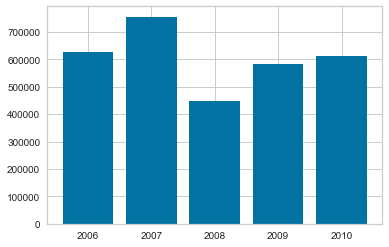

In [382]:
plt.bar('YrSold','SalePrice',data=train)

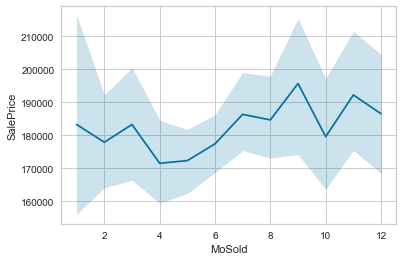

In [383]:
sns.lineplot('MoSold','SalePrice',data=train)

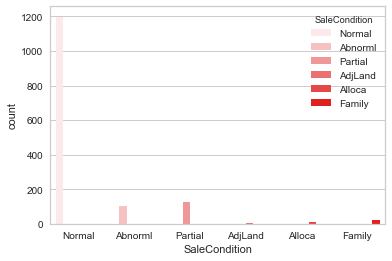

In [384]:
sns.countplot(x='SaleCondition',hue='SaleCondition',data=train,color='red',palette=None)

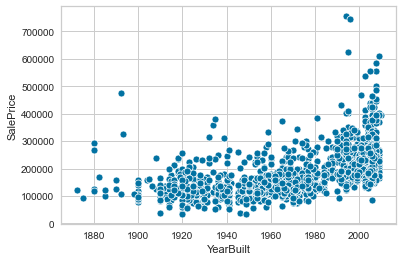

In [385]:
sns.scatterplot(x='YearBuilt',y='SalePrice',data=train,palette=None,markers=True,)

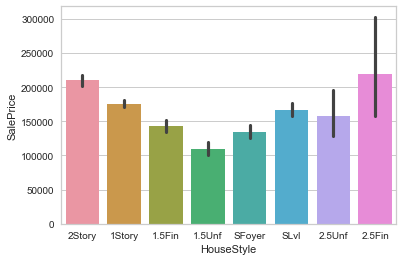

In [386]:
sns.barplot(x='HouseStyle',y='SalePrice',data=train)

<IPython.core.display.Javascript object>

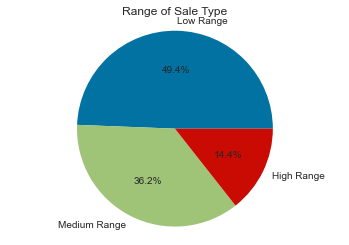

In [387]:
train['saletype'] = 'Low Range'
train.loc[(train['SalePrice'] >= 143000) & (train['SalePrice'] <= 254000), 'saletype'] = 'Medium Range'
train.loc[(train['SalePrice'] > 254000), 'saletype'] = 'High Range'

train_flight = pd.DataFrame(train['saletype'].value_counts().reset_index().values, columns=['saletype','AggregateType'])
labels = ['Low Range','Medium Range','High Range']
value = [train_flight['AggregateType'][0], train_flight['AggregateType'][1], train_flight['AggregateType'][2]]

plt.pie(value, labels=labels, autopct='%1.1f%%')
plt.title('Range of Sale Type')
plt.axis('equal')
plt.show()

In [388]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)

<IPython.core.display.Javascript object>

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageQual,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageType,81,0.055479


In [389]:
train.shape

(1460, 82)

In [390]:
categorical_features = train.select_dtypes(include='object').columns
numerical_features = train.select_dtypes(exclude='object').columns

df_cat = train[categorical_features]
df_num = train[numerical_features]

In [391]:
print(df_cat)
print(df_num)

     MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition

In [392]:
data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'], test.loc[:,'MSSubClass':'SaleCondition']))

<IPython.core.display.Javascript object>

In [393]:
var1=['Exterior1st','Exterior2nd','SaleType','Electrical','KitchenQual']
for v in var1:
    data[v]=data[v].fillna(data[v].mode()[0])
data['MSZoning']=data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

for col in ['GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',"PoolQC",'Alley','Fence','MiscFeature','FireplaceQu','MasVnrType','Utilities']:
    data[col]=data[col].fillna('None')

for col in ['GarageYrBlt','GarageArea','GarageCars','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BsmtUnfSF','TotalBsmtSF']:
     data[col]=data[col].fillna(0)
data['LotFrontage']=data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median())) 
data['Functional']=data['Functional'].fillna('Typ')

data=pd.get_dummies(data)
data.shape

<IPython.core.display.Javascript object>

(2919, 303)

In [394]:
data.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 303, dtype: int64

In [395]:
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

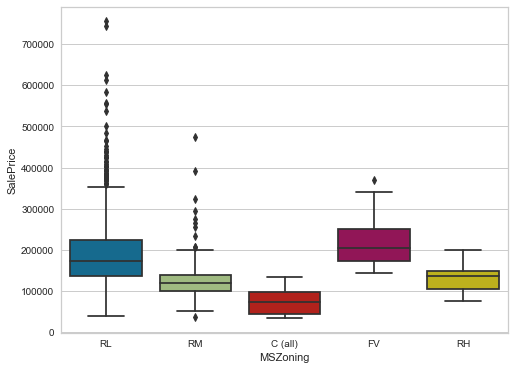

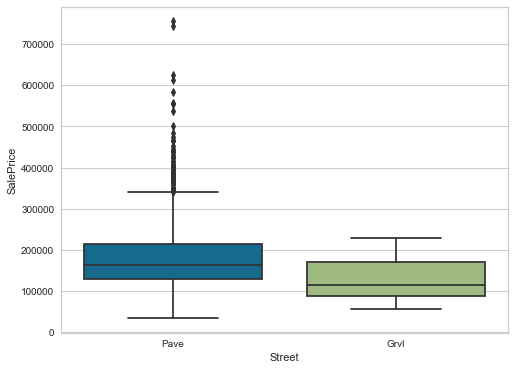

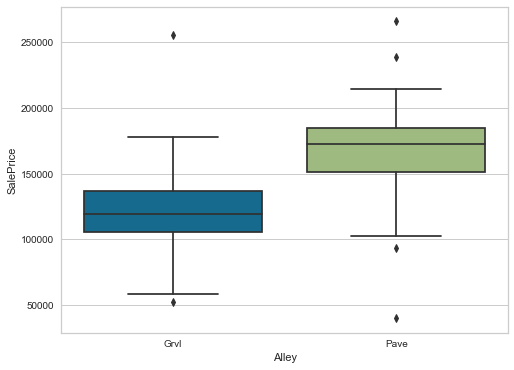

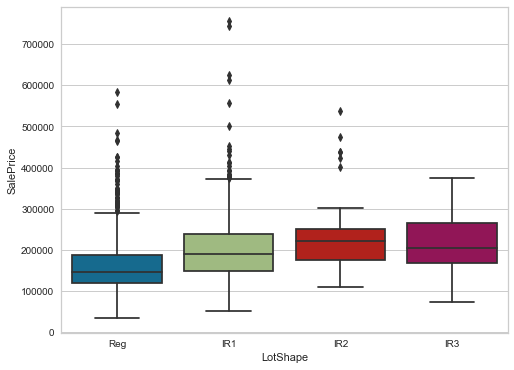

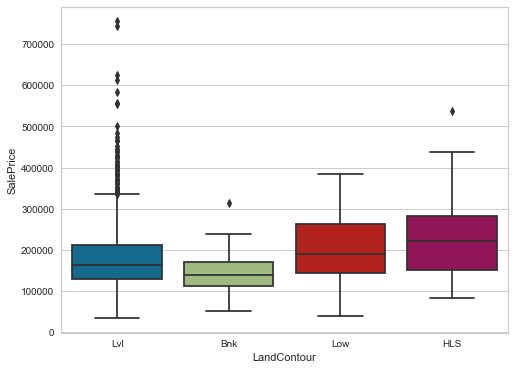

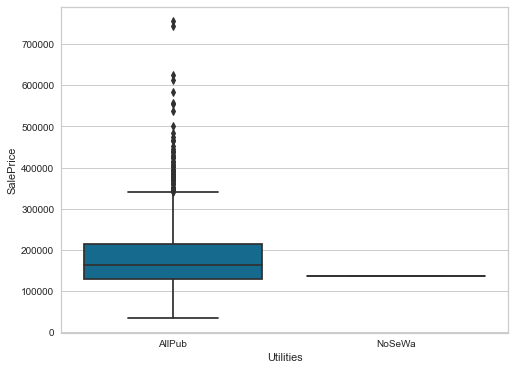

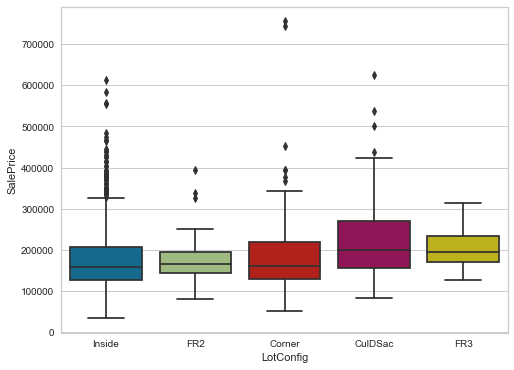

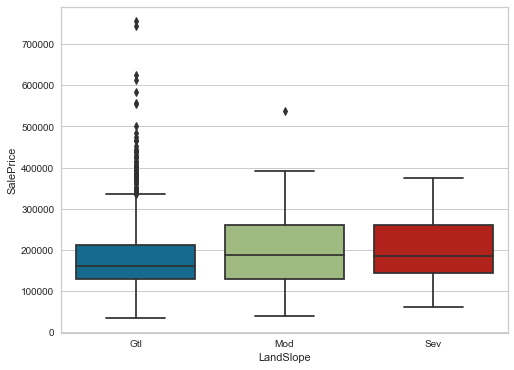

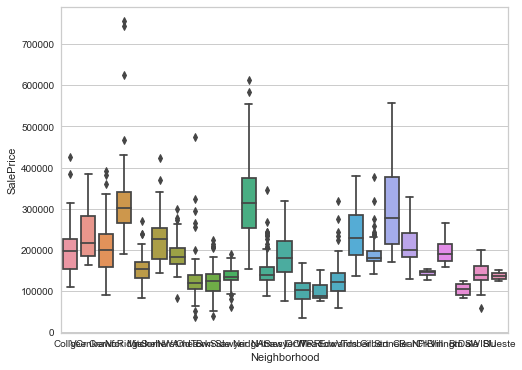

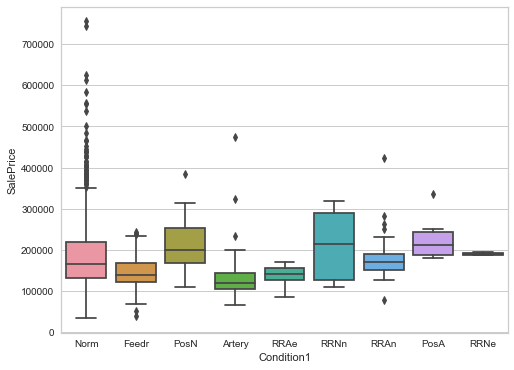

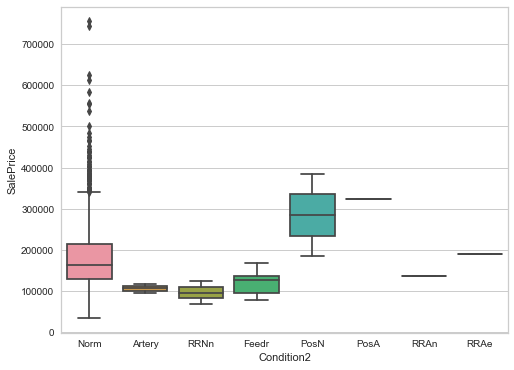

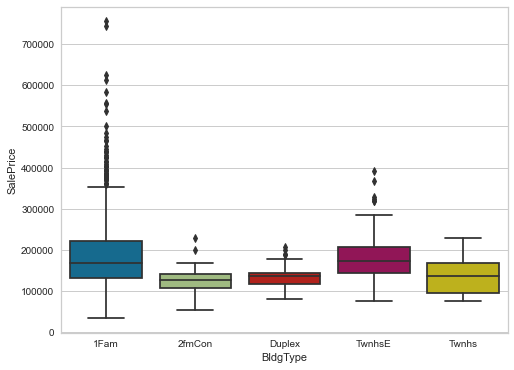

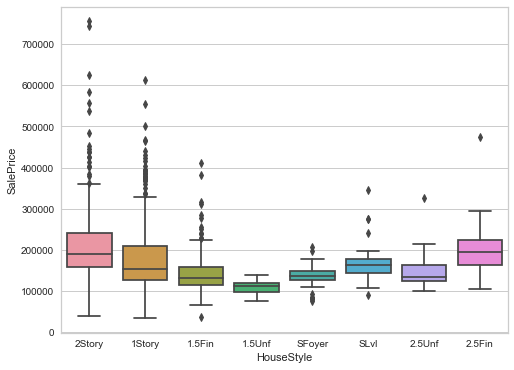

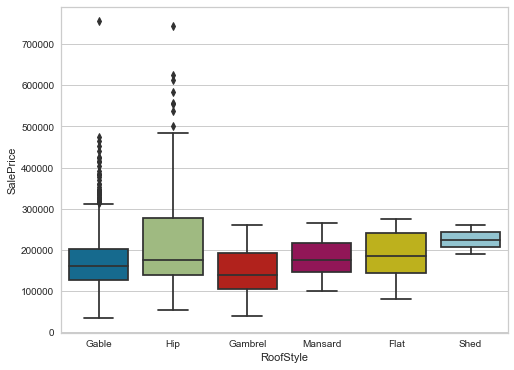

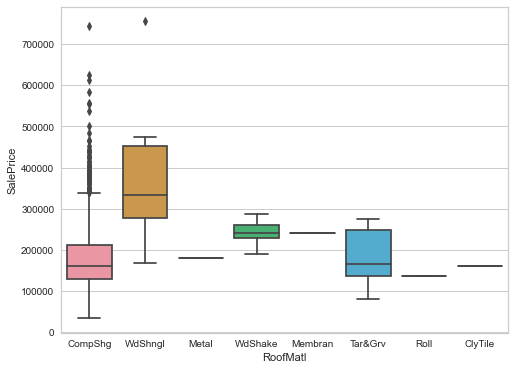

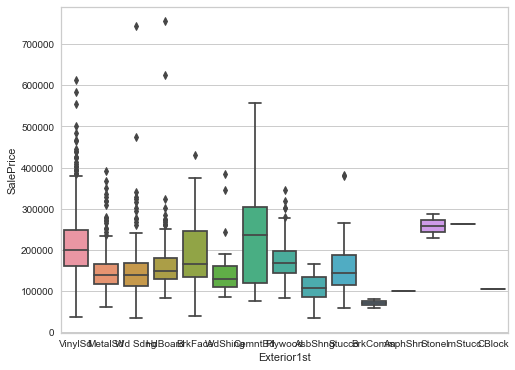

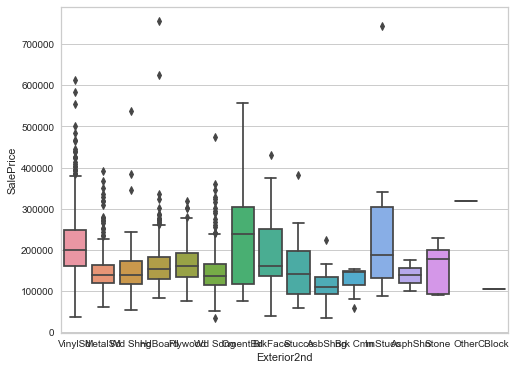

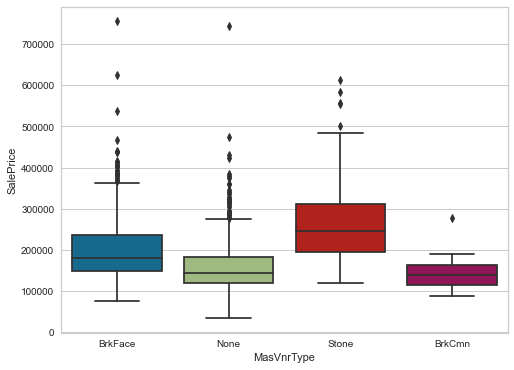

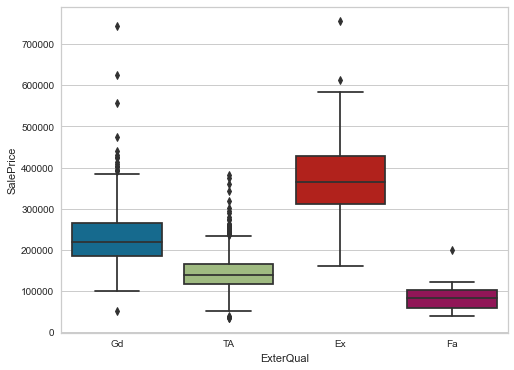

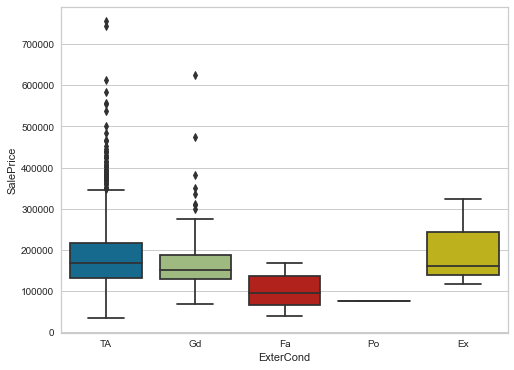

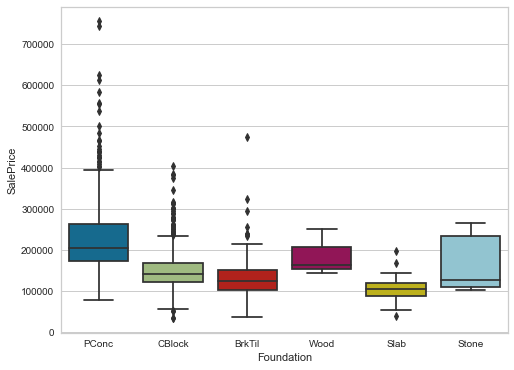

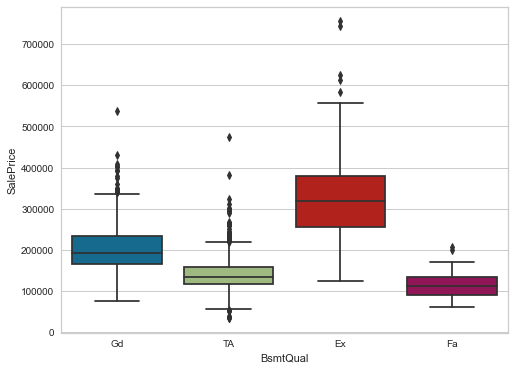

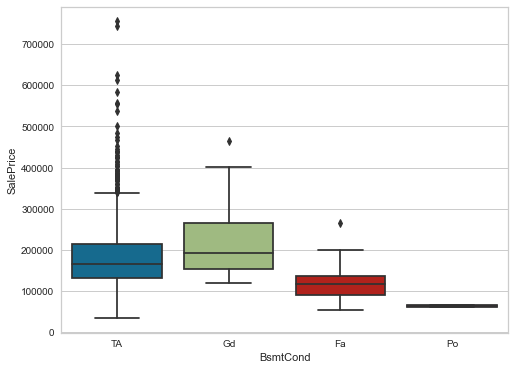

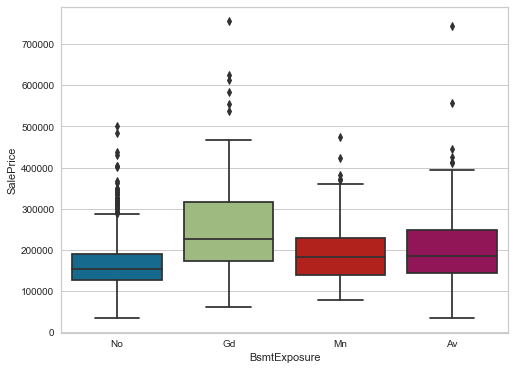

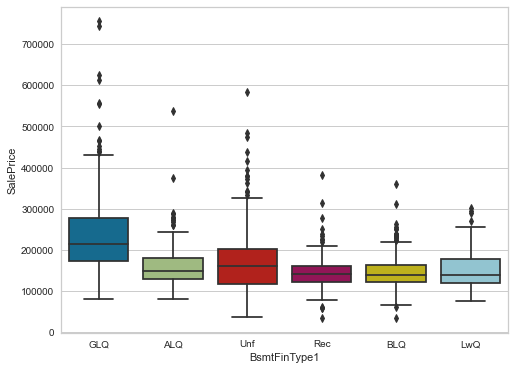

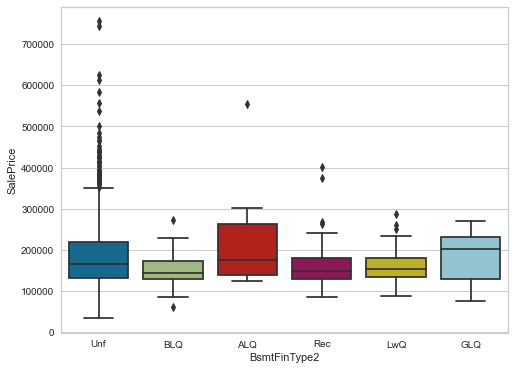

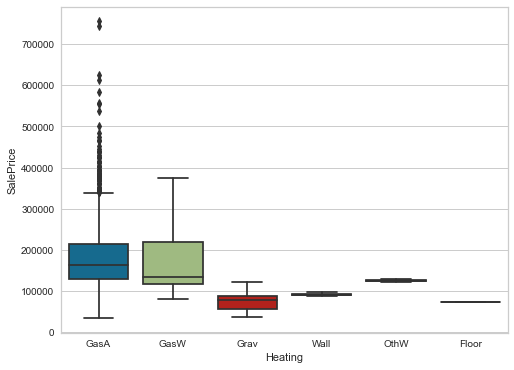

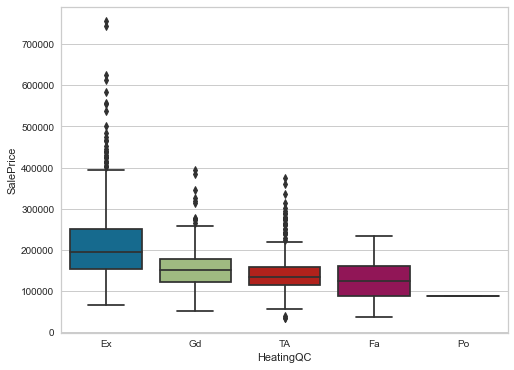

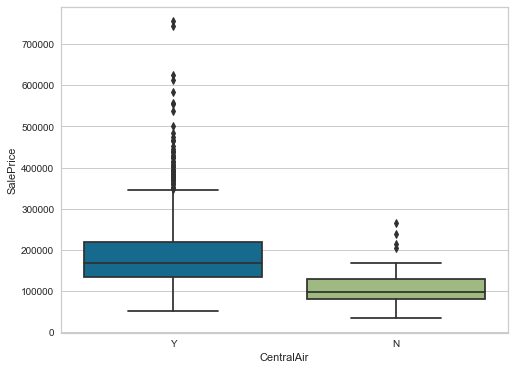

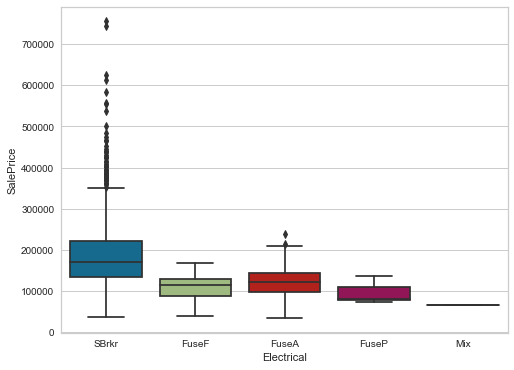

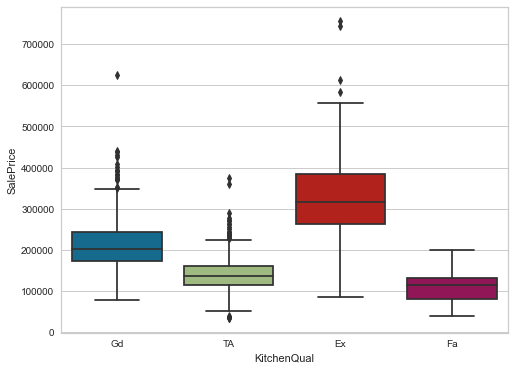

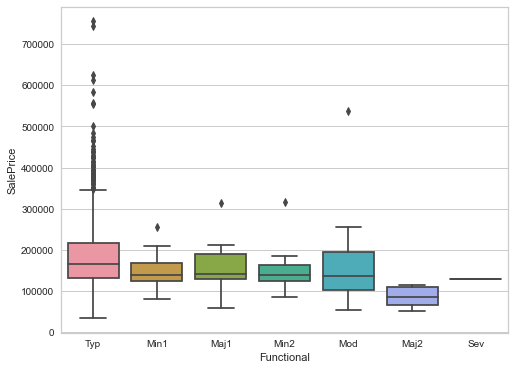

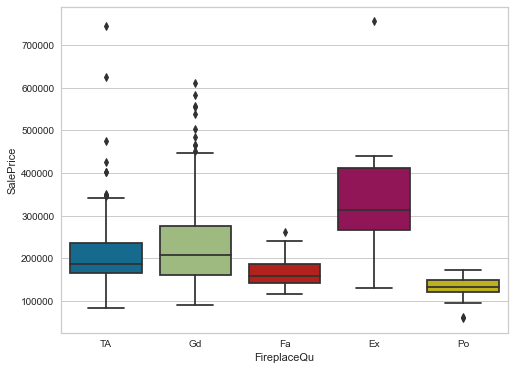

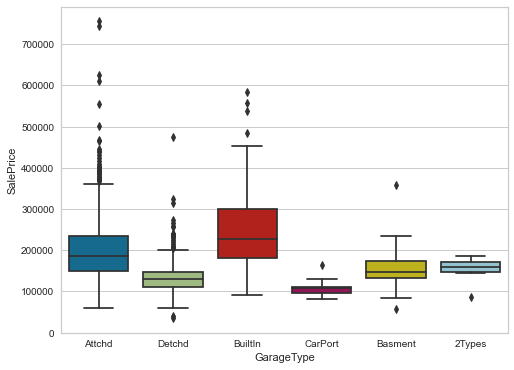

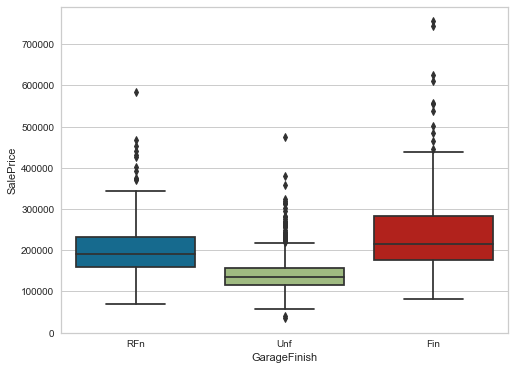

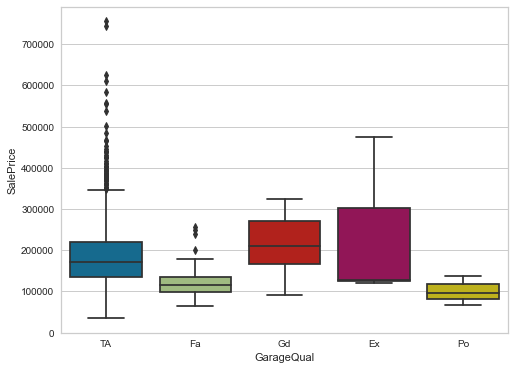

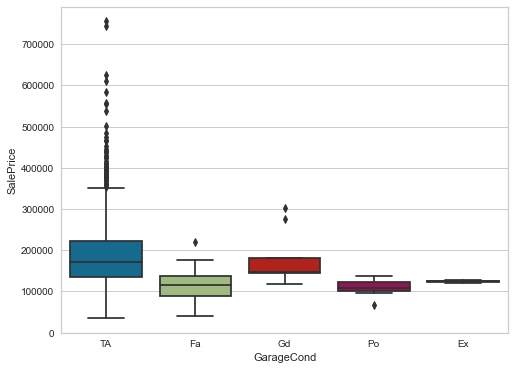

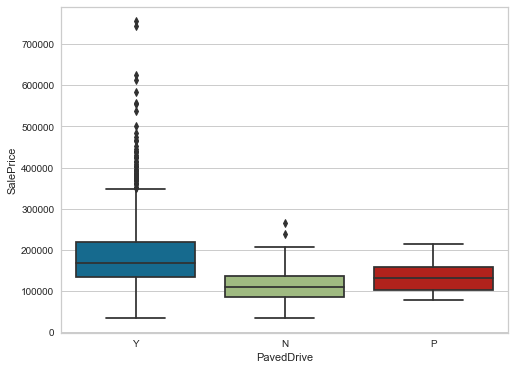

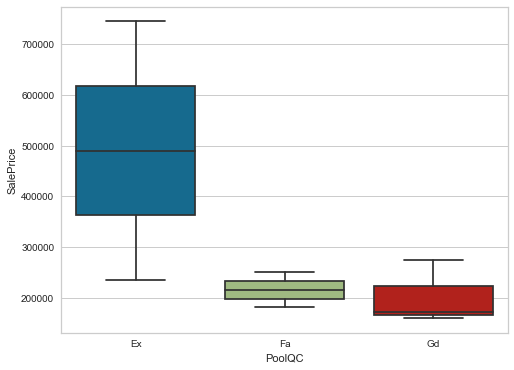

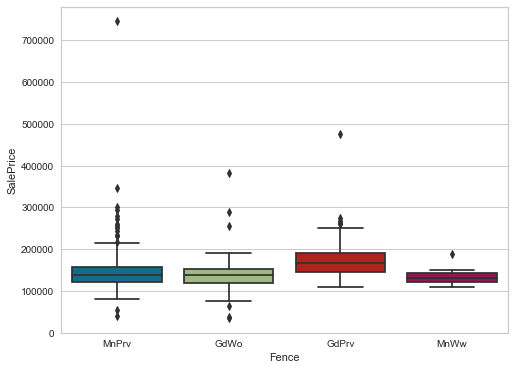

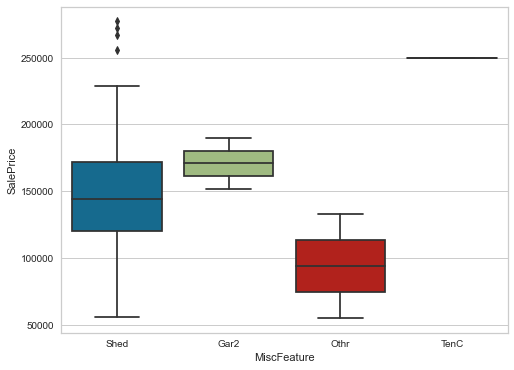

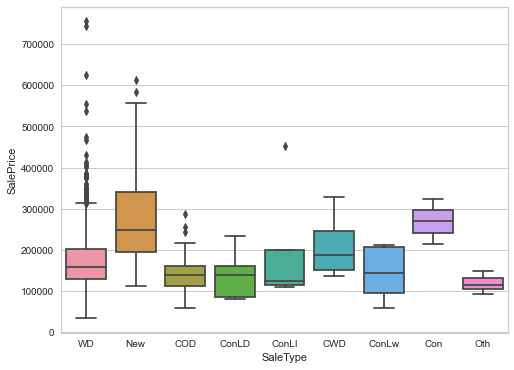

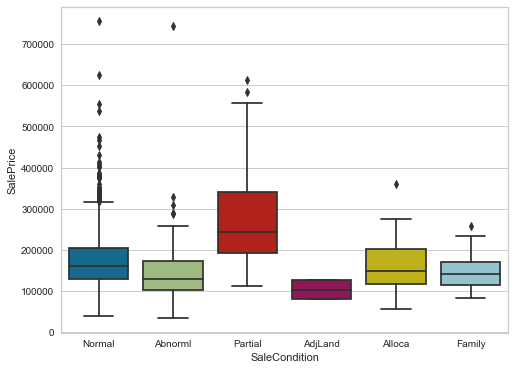

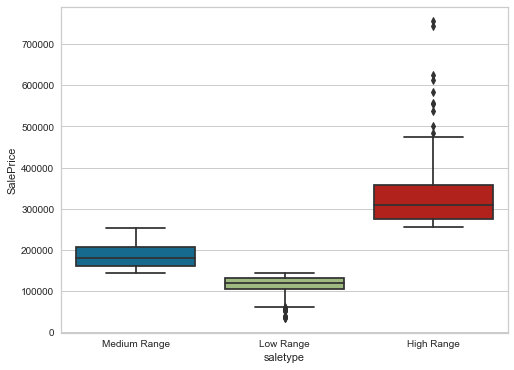

In [396]:
vars_box = df_cat
for var3 in vars_box:
    data3 = pd.concat([train['SalePrice'], train[var3]], axis=1)
    f, ax = plt.subplots(figsize=(8,6))
    fig = sns.boxplot(x=var3, y='SalePrice', data=data3)

In [397]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols('SalePrice ~ MSSubClass+LotArea+OverallQual+OverallCond+YearBuilt+YearRemodAdd+BsmtFinSF1+BsmtFinSF2+BsmtUnfSF+TotalBsmtSF+LowQualFinSF+GrLivArea+BsmtFullBath+BsmtHalfBath+FullBath+HalfBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageCars+GarageArea+WoodDeckSF+OpenPorchSF+EnclosedPorch+ScreenPorch+PoolArea+MiscVal+MoSold+YrSold', data=df_num).fit()
print(model.summary)

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x000001E185D445C8>>


In [398]:
corr = train.corr()['SalePrice']
corr[np.argsort(corr, axis=0)[::-1]]

<IPython.core.display.Javascript object>

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [399]:
from sklearn.model_selection import train_test_split
x=train_data
y=train.loc[:,'SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

<IPython.core.display.Javascript object>

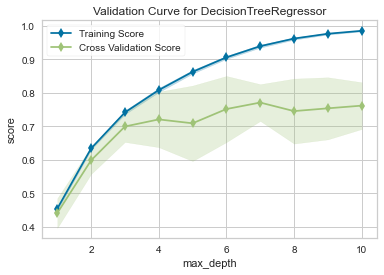

In [400]:
from yellowbrick.model_selection import ValidationCurve
from sklearn.tree import DecisionTreeRegressor

viz = ValidationCurve(DecisionTreeRegressor(), param_name='max_depth', param_range=np.arange(1, 11), cv=10, scoring='r2')
viz.fit(x, y)
viz.show()

In [401]:
import xgboost as xgb

model = xgb.XGBRegressor(n_estimators=2000, max_depth=6, learning_rate=0.1, verbosity=1, silent=None, objective='reg:linear', booster='gbtree', n_jobs=-1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=0.8, colsample_bytree=0.8, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0.2, reg_lambda=1.2, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain')

In [402]:
model.fit(x_train, y_train)

[00:08:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=2000, n_jobs=-1, nthread=-1, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0.2,
             reg_lambda=1.2, scale_pos_weight=1, seed=0, silent=None,
             subsample=0.8, tree_method=None, validate_parameters=False,
             verbosity=1)

0.8967294587199175

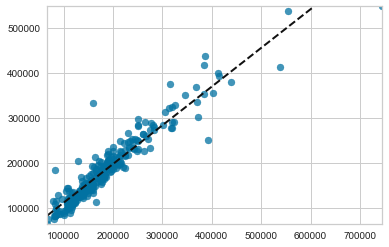

In [403]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model)
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)

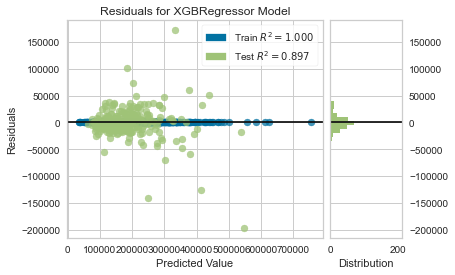

In [404]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

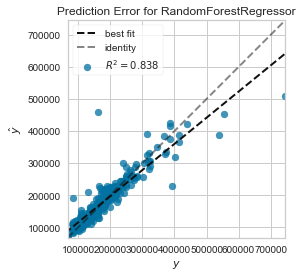

In [405]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(n_estimators=600, random_state=0, n_jobs=-1)
visualizer = PredictionError(model1)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

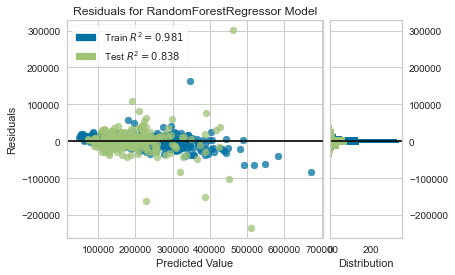

In [406]:
visualizer = ResidualsPlot(model1)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

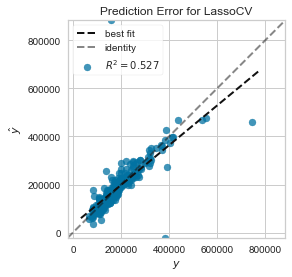

In [407]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
model2 = LassoCV(alphas=[1, 0.1, 0.001, 0.0005])
visualizer = PredictionError(model2)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

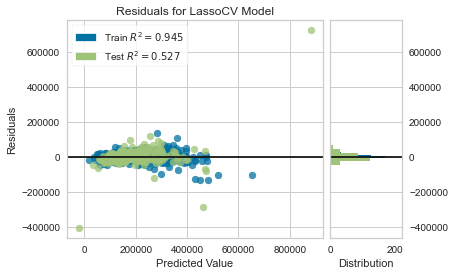

In [408]:
visualizer = ResidualsPlot(model2)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

In [409]:
x_test = x[:50]
y_test = y[:50]

pred = model.predict(x_test)
pred = model1.predict(x_test)
pred = model2.predict(x_test)


print('XGBoost :',model.score(x_test, y_test))
print('RandomForestRegressor :',model1.score(x_test, y_test))
print('Lasso :',model2.score(x_test, y_test))

XGBoost : 0.9807814151191037
RandomForestRegressor : 0.9816299141687906
Lasso : 0.9236012793522428


In [415]:
test_Id = test['Id']
submission = pd.DataFrame()
submission['Id'] = test_Id
submission['SalePrice'] = y
submission.to_csv('submission.csv',index=False)

<IPython.core.display.Javascript object>